In [5]:
"""
Neurosynth practice example 
2019_02_13
Kun Il Kim
"""
# ## Importing modules
from neurosynth.base.dataset import Dataset
from neurosynth.analysis import meta, decode, network
import neurosynth

%matplotlib inline
import nibabel as nib
from nilearn import plotting as niplt
import numpy as np

#path for the neurosynth data
#C:\Users\kkim\Desktop\neurosynth_project



In [11]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\kkim\Desktop\neurosynth-mfc-master\other


In [6]:
#load the neurosynth Archive
dataset = Dataset.load('C:/Users/kkim/Desktop/neurosynth_project/data/dataset.pkl')

In [7]:
#check how many studies are there for each term. Increasing frequency leads to decrease in num studies found. 
ids1 = dataset.get_studies(features='theory mind', frequency_threshold=0.05)
ids2 = dataset.get_studies(features='emotion*', frequency_threshold=0.05)
ids3 = dataset.get_studies(features='valence', frequency_threshold=0.05)

print(len(ids1))
print(len(ids2))
print(len(ids3))

175
1964
358


In [8]:

#running the meta analysis and saving the results
ids = dataset.get_studies(expression='emotion* | valence | theory mind', frequency_threshold=0.05)
ma = meta.MetaAnalysis(dataset, ids)
ma.save_results('.', 'EVT')
print("Found %d studies." %len(ids))

Generating LALR tables
C:\Users\kkim\Anaconda3\lib\site-packages\neurosynth\analysis\meta.py:134: RuntimeWarning: invalid value encountered in true_divide
  pFgA = pAgF * pF / pA
C:\Users\kkim\Anaconda3\lib\site-packages\neurosynth\analysis\meta.py:139: RuntimeWarning: invalid value encountered in true_divide
  pFgA_prior = pAgF * prior / pAgF_prior


Found 2209 studies.


C:\Users\kkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  after removing the cwd from sys.path.


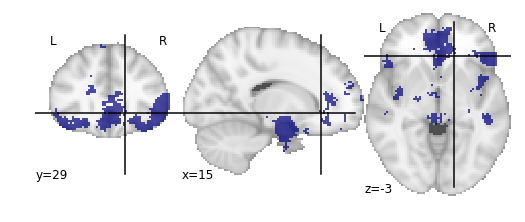

In [9]:
#loading the mata data. the meta data has various values due to its z scores. Convert all the positive numbers to 1. 

task1 = nib.load('EVT_association-test_z_FDR_0.01.nii.gz')
task1 = nib.Nifti1Image((task1.get_data() > 0).astype('int'), task1.get_header().get_best_affine())
task1.get_data()[task1.get_data() > 0] = 1
niplt.plot_roi(task1)

In [10]:
nib.save(task1, 'EVT mask.nii') #saving the mask